# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**: Clara Bureu

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [87]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-0.905005,-0.900913,0.964696,1.051848,-0.905590,-154.693410
1,0.004701,-0.892027,0.519084,-0.244066,1.129811,-73.713872
2,1.144490,1.463076,2.331177,0.238782,-0.553775,222.533698
3,-0.067844,0.569083,-0.965437,1.797312,1.123009,41.307240
4,2.307864,-1.245343,-1.246898,0.157288,-0.746952,100.076758


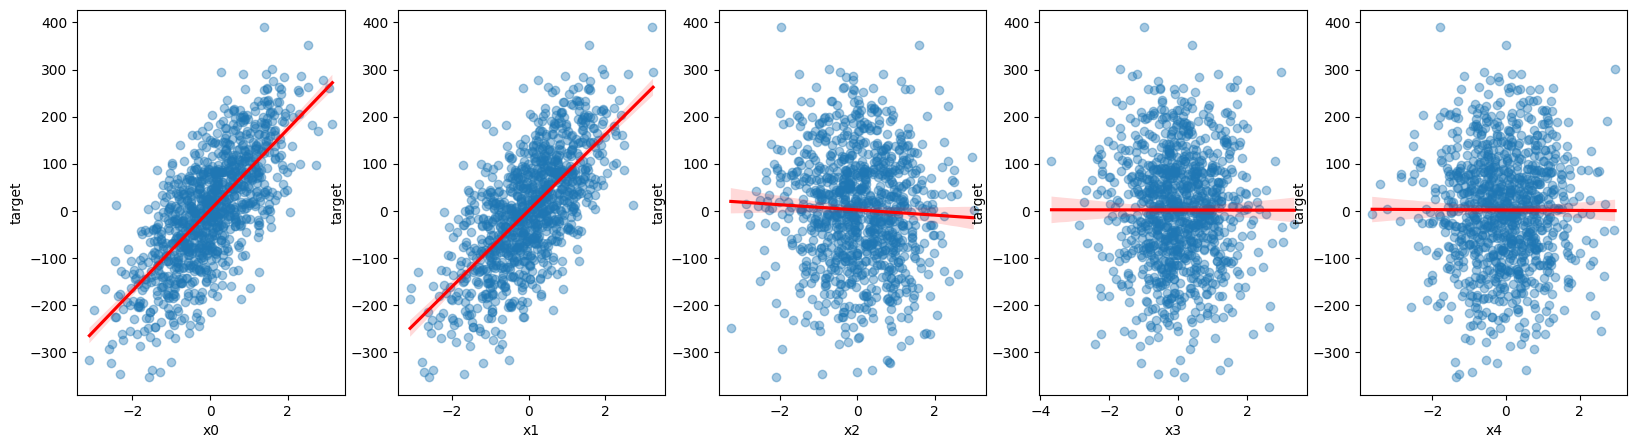

In [90]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [91]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [92]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

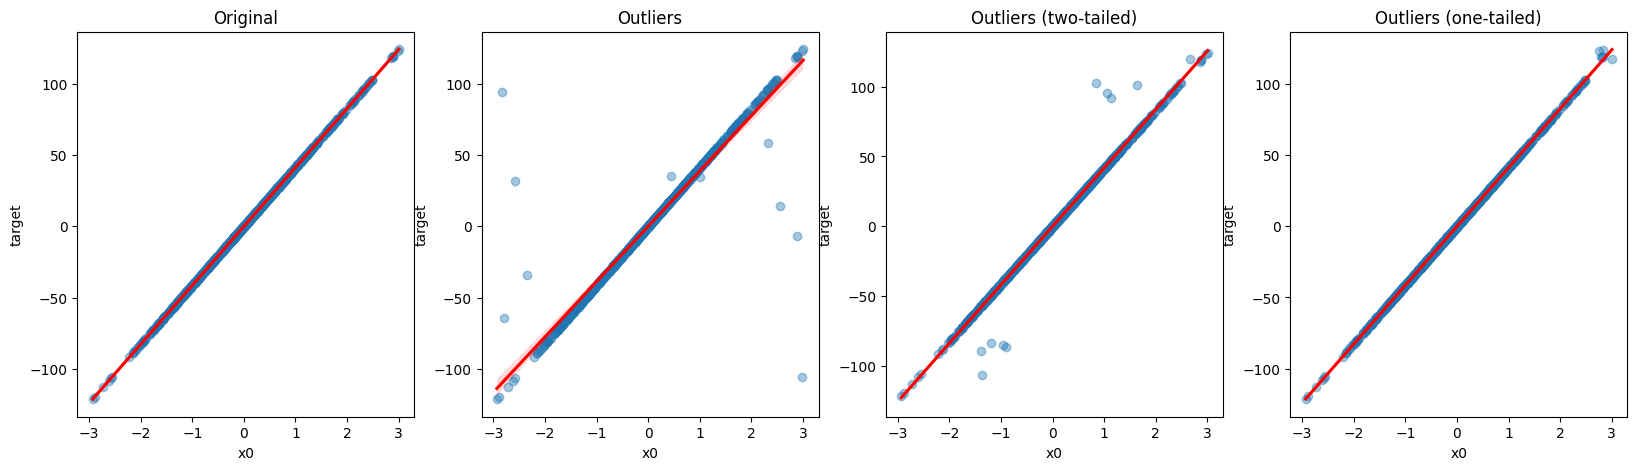

In [93]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

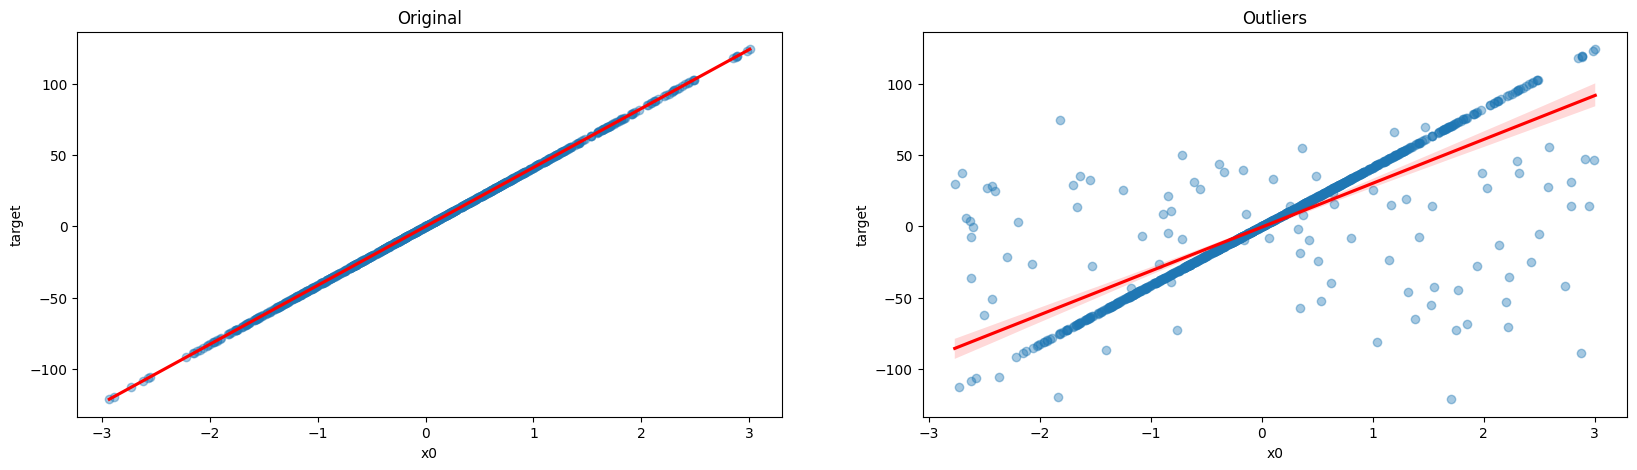

In [94]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t


In [96]:
## Parámetros de la simulación
n_exp = 100
#n_exp = 1
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

#noise = np.linspace(0, 100, 100)
bias = [0,5,10]
noise = [0,10,20]
#bias = np.linspace(0, 1, 20)

# Listas para guardar los resultados
coef_list = []  
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []

In [97]:
results = pd.DataFrame()

In [98]:
results = pd.DataFrame(
    columns= [f'coef_{i}' for i in range(n_features)] + ['intercept', 'bias', 'noise']
)

for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )

            # Dividir el dataset en entrenamiento y prueba
            X = data.drop(columns=['target'])
            y = data['target']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

            # Ajustar un modelo de regresión lineal
            model = LinearRegression(fit_intercept=True)
            model.fit(X_train, y_train)
            
            coefs = (list(model.coef_))
            coefs.append(model.intercept_)
            coefs.append(b)
            coefs.append(n)

            results.loc[len(results)] = coefs
            
            # Calcular RMSE y MAE en entrenamiento
            y_train_pred = model.predict(X_train)
            rmse_train_list.append(mean_squared_error(y_train, y_train_pred, squared=False))
            mae_train_list.append(mean_absolute_error(y_train, y_train_pred))

            # Calcular RMSE y MAE en prueba
            y_test_pred = model.predict(X_test)
            rmse_test_list.append(mean_squared_error(y_test, y_test_pred, squared=False))
            mae_test_list.append(mean_absolute_error(y_test, y_test_pred))

coefficients = results['coef_1']

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:06<00:00, 15.56it/s]


In [99]:
results

,coef_0,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9,intercept,bias,noise
0,51.842411,73.215707,-6.394885e-14,3.197442e-14,1.154632e-14,-8.526513e-14,7.371881e-14,2.131628e-14,6.084022e-14,-1.065814e-14,-4.066192e-15,0.0,0.0
1,89.814893,94.244466,3.106878e-01,8.546678e-01,-5.636047e-01,-4.696821e-01,-6.230835e-01,-1.941628e-01,-5.412990e-01,3.813126e-01,1.029072e-01,0.0,10.0
2,79.751935,55.668930,2.608303e-02,-1.025900e+00,-5.027228e-01,-9.213390e-01,1.545179e-01,6.749399e-01,-8.709079e-01,-1.939556e-01,2.752354e-01,0.0,20.0
3,31.918772,51.600947,1.421085e-14,1.776357e-14,-1.776357e-14,-2.486900e-14,2.575717e-14,-2.842171e-14,-3.552714e-15,-1.421085e-14,5.000000e+00,5.0,0.0
4,21.338805,2.708368,-4.016582e-02,1.894951e-01,1.924829e-01,2.031846e-01,-2.624204e-01,-6.237804e-02,3.008095e-01,-3.803064e-01,4.342645e+00,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,51.867746,65.933363,1.668530e-01,-3.583149e-01,-7.902573e-01,-9.413333e-01,2.291378e-01,-9.460732e-02,-7.318136e-02,-2.751071e-01,5.069467e+00,5.0,10.0
896,57.843844,67.624638,4.226497e-03,-3.218557e-01,7.389594e-01,2.425473e-01,-7.691402e-03,7.597286e-01,-1.229743e+00,-1.844529e-02,5.787331e+00,5.0,20.0
897,41.923933,26.947795,1.953993e-14,-3.286260e-14,4.640732e-14,2.664535e-14,1.243450e-14,-3.552714e-15,4.796163e-14,2.087219e-14,1.000000e+01,10.0,0.0
898,12.443284,6.544170,2.016925e-01,-4.707352e-01,-4.593858e-01,9.308275e-02,3.139105e-01,1.316284e-01,4.010419e-01,-2.259447e-02,9.630024e+00,10.0,10.0


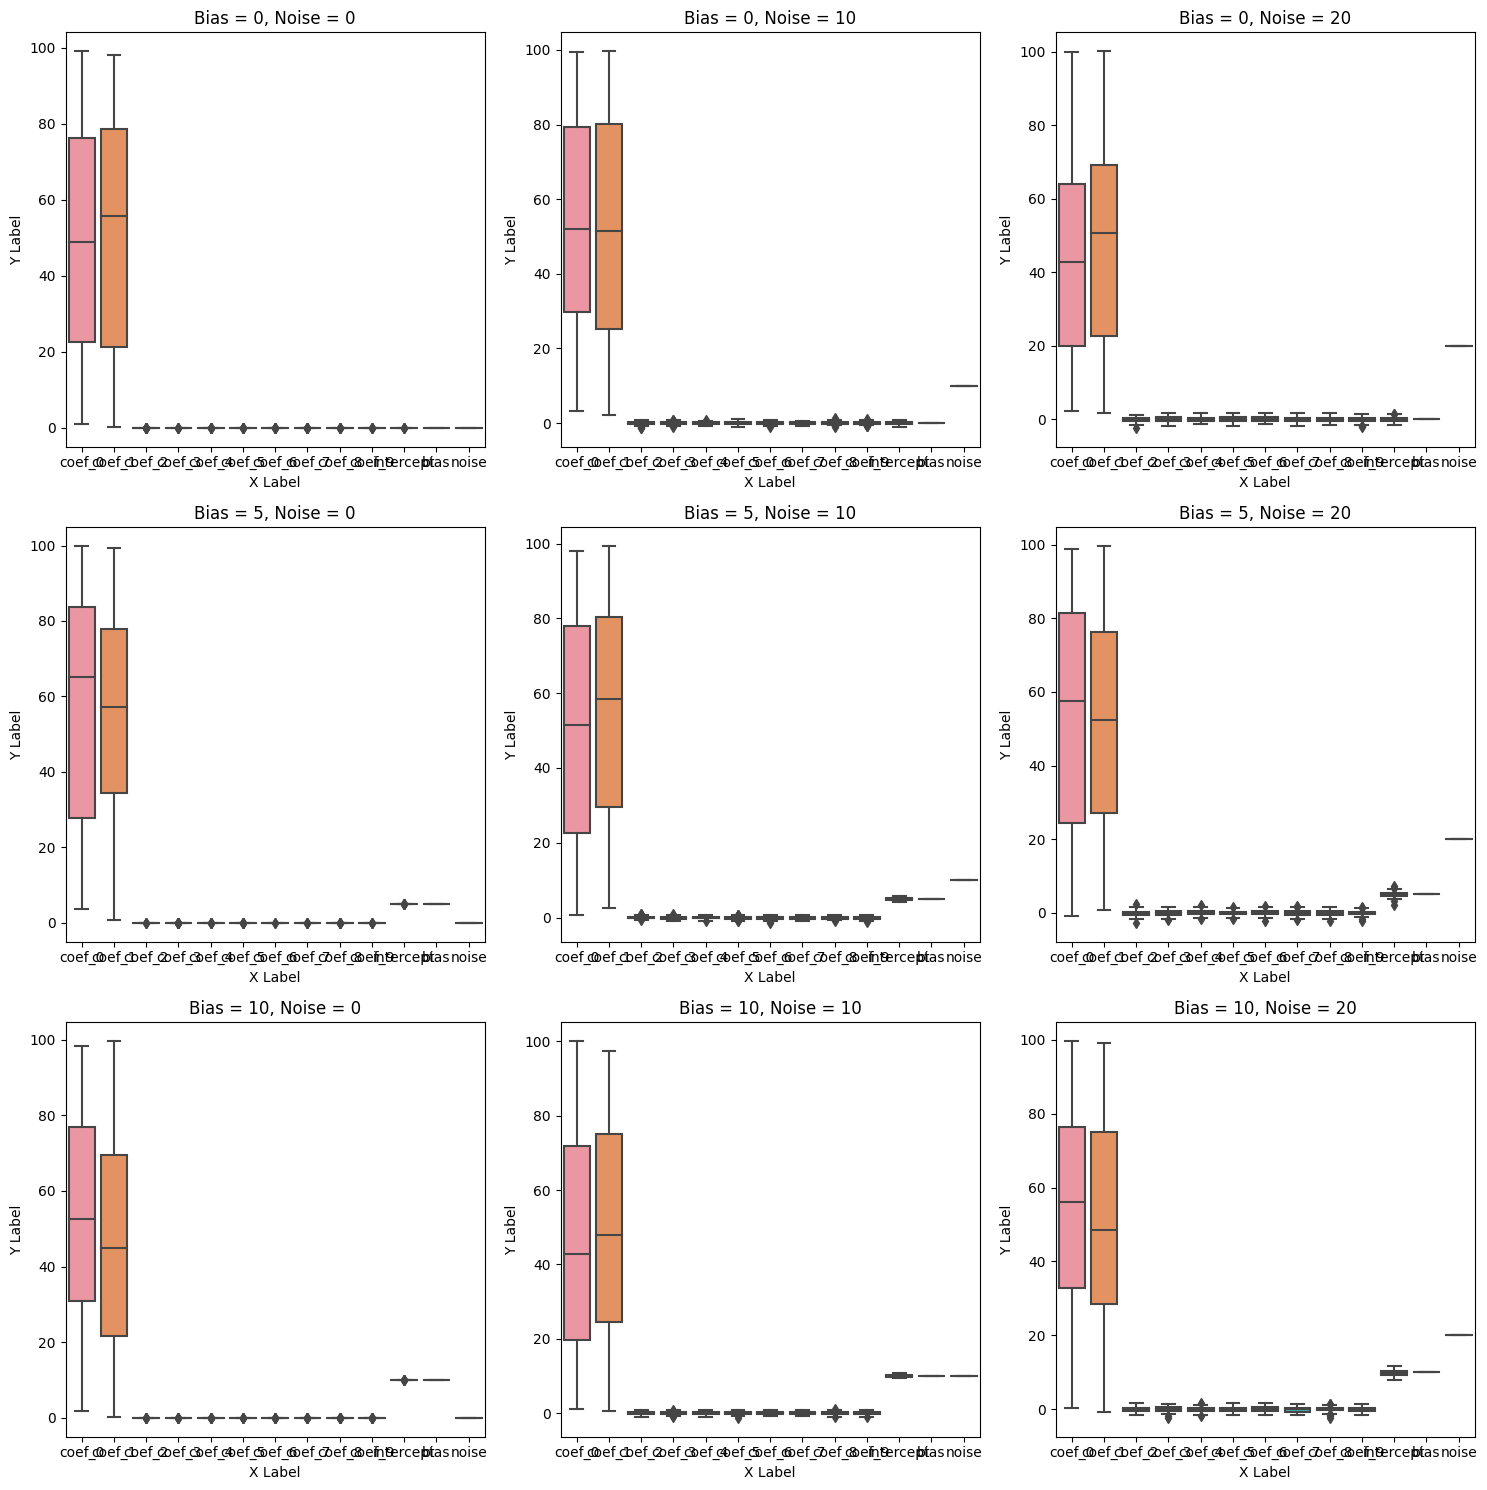

In [100]:
import seaborn as smf

comparar = [
    results.loc[(results.bias == bias) & (results.noise == noise)]
    for bias in [0, 5, 10]
    for noise in [0, 10, 20]
]

# Crear una matriz de 3x3 subtramas
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Enumerar sobre las comparaciones y los ejes
for i, (comparison, ax) in enumerate(zip(comparar, axes.flat)):
    bias_value = [0, 5, 10][i // 3]  # Obtener el valor de bias correspondiente
    noise_value = [0, 10, 20][i % 3]  # Obtener el valor de noise correspondiente
    sns.boxplot(data=comparison, ax=ax)
    ax.set_title(f'Bias = {bias_value}, Noise = {noise_value}')
    ax.set_xlabel('X Label')  # Agrega etiquetas si es necesario
    ax.set_ylabel('Y Label')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()



Test de Hipótesis

In [101]:
from scipy import stats

alpha = 0.05 # Probabilidad de rechazar H0 cuando es verdadera

for coef_idx in range(n_features):
    coef_column = f'coef_{coef_idx}'
    coef_values = results[coef_column]
    
    t_statistic, p_value = stats.ttest_1samp(coef_values, popmean=0)  # Realizar la prueba de hipótesis
    
    if p_value < alpha:
        print(f"El coeficiente {coef_column} tiene un efecto significativo en el modelo, con alpha=0.05.")
    else:
        print(f"El coeficiente {coef_column} no tiene un efecto significativo en el modelo, con alpha=0.05.")

El coeficiente coef_0 tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_1 tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_2 no tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_3 no tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_4 no tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_5 no tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_6 no tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_7 no tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_8 no tiene un efecto significativo en el modelo, con alpha=0.05.
El coeficiente coef_9 no tiene un efecto significativo en el modelo, con alpha=0.05.


### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

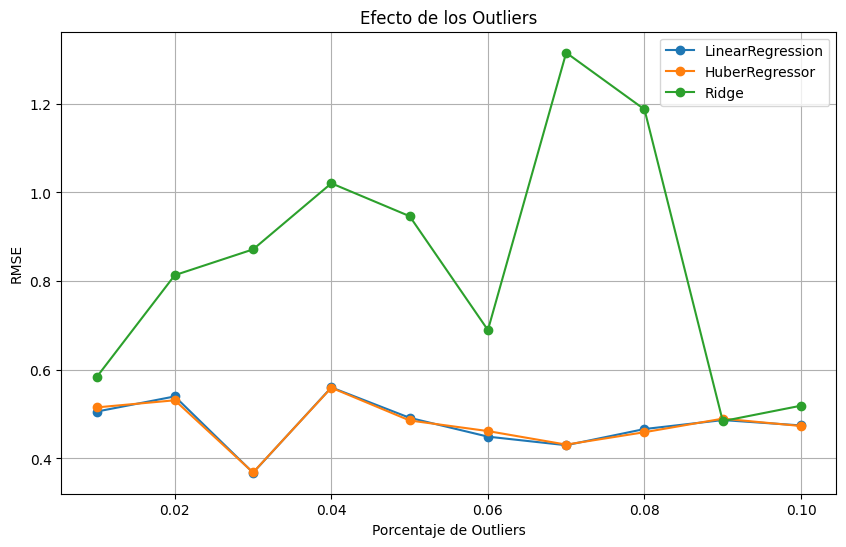

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

n_samples = 100
n_features = 1
noise = 0.5
extreme_outliers = False
outlier_percentages = np.arange(0.01, 0.11, 0.01)  # Rango de 1% a 10%

results = pd.DataFrame(columns=['Outlier Percentage', 'Model', 'RMSE'])

for outlier_percentage in outlier_percentages:
    data = generate_dataset(n_samples=n_samples, n_features=n_features, noise=noise, output='dataframe')
    if extreme_outliers:
        data = generate_outliers(data, percentage=outlier_percentage, method='extreme')
    
    # Dividir el dataset en entrenamiento y prueba
    X = data.drop(columns=['target'])
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Inicializar los modelos
    models = [
        LinearRegression(),
        HuberRegressor(),
        Ridge()
    ]
    
    # Entrenar y evaluar los modelos
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        results.loc[len(results)] = (outlier_percentage, model_name, rmse)

plt.figure(figsize=(10, 6))
for model_name in results['Model'].unique():
    model_results = results[results['Model'] == model_name]
    plt.plot(model_results['Outlier Percentage'], model_results['RMSE'], marker='o', label=model_name)

plt.title("Efecto de los Outliers")
plt.xlabel("Porcentaje de Outliers")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [103]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [105]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=.1,
    bias=0,
    output='dataframe'
)

data = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=False,
    only_tails=False,
)


In [235]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


def GD(X_train, y_train, X_test, y_test, theta, n_iteraciones, tol, alpha):
    break_tol = False
    X_train_df = pd.DataFrame({'x0': X_train})
    X_train_df.insert(0,'b0',1)

    X_test_df = pd.DataFrame({'x0': X_test})
    X_test_df.insert(0,'b0',1)
    
    error_train = []
    error_test = []

    for i in range(n_iteraciones):
        print('------------')
        print('Iteracion', str(i+1))
        print(X_train)

        gd = gradient(X_train_df, y_train, theta)

        theta2 = theta - alpha * gd
       
        if (np.all(((np.abs(theta-theta2))/theta) < tol)):
            break_tol = True

        theta = theta2
        y_train_gd = X_train_df.dot(theta) 
        error_train.append(mse(y_train, y_train_gd))
        y_test_gd = X_test_df.dot(theta)  
        error_test.append(mse(y_test, y_test_gd))

        if (break_tol):
            break
        
    return theta, error_train, error_test



In [236]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(data['x0'], data['target'], test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_train)

(800,)
(800,)
255   -0.387539
689    2.028571
700    0.486918
927    0.548760
359    0.828954
         ...   
945   -0.965240
920    0.596938
303   -0.701812
16     0.766758
390    0.802243
Name: x0, Length: 800, dtype: float64


------------
Iteracion 1
255   -0.387539
689    2.028571
700    0.486918
927    0.548760
359    0.828954
         ...   
945   -0.965240
920    0.596938
303   -0.701812
16     0.766758
390    0.802243
Name: x0, Length: 800, dtype: float64
------------
Iteracion 2
255   -0.387539
689    2.028571
700    0.486918
927    0.548760
359    0.828954
         ...   
945   -0.965240
920    0.596938
303   -0.701812
16     0.766758
390    0.802243
Name: x0, Length: 800, dtype: float64
------------
Iteracion 3
255   -0.387539
689    2.028571
700    0.486918
927    0.548760
359    0.828954
         ...   
945   -0.965240
920    0.596938
303   -0.701812
16     0.766758
390    0.802243
Name: x0, Length: 800, dtype: float64
------------
Iteracion 4
255   -0.387539
689    2.028571
700    0.486918
927    0.548760
359    0.828954
         ...   
945   -0.965240
920    0.596938
303   -0.701812
16     0.766758
390    0.802243
Name: x0, Length: 800, dtype: float64
------------
Iteracion 5
255   -0.387539
689

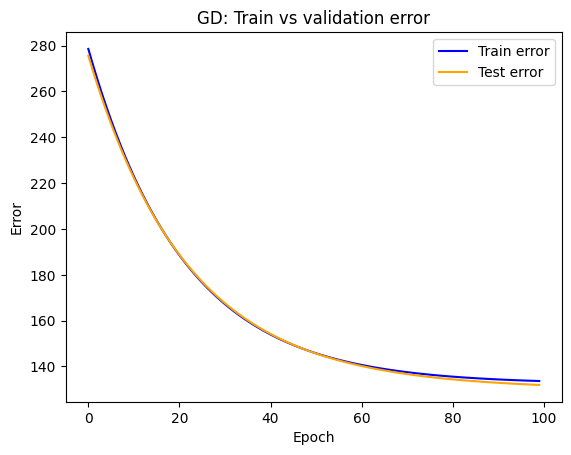

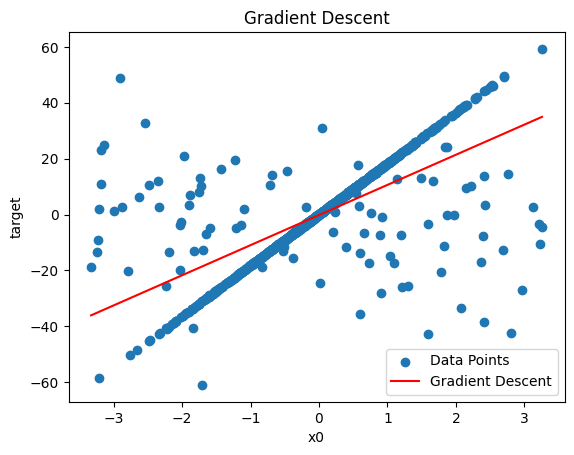

In [237]:
# Hiperparametros
epoch = 100
tol = 0.001
alpha = 0.01
theta = np.random.rand(2)

theta, err_train, err_test = GD(
    X_train, y_train, X_test, y_test, theta, n_iteraciones=epoch, tol=tol, alpha=alpha)

plt.plot(err_train, color='blue', label="Train error")
plt.plot(err_test, color='orange', label="Test error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("GD: Train vs validation error")
plt.legend()
plt.show()

x_line = np.linspace(data['x0'].values.min(), data['x0'].values.max(), 100)
y_line = theta['x0'] * x_line + theta['b0']

# Plot the data points and regression line
plt.scatter(data['x0'].values, data['target'].values, label='Data Points')
plt.plot(x_line, y_line, color='red', label='Gradient Descent')
plt.xlabel('x0')
plt.ylabel('target')
plt.legend()
plt.title('Gradient Descent')
plt.show()

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [164]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=.1,
    bias=0,
    output='dataframe'
)

data = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=False,
    only_tails=False,
)

In [242]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def SGD(X_train, y_train, X_test, y_test, theta, n_iteraciones, tol, alpha):
    theta = np.zeros(2)
    error_train = []
    error_test = []

    X_train_df = pd.DataFrame({'x0': X_train})
    X_train_df.insert(0,'b0',1)

    X_test_df = pd.DataFrame({'x0': X_test})
    X_test_df.insert(0,'b0',1)
    
    for i in range(n_iteraciones):
        print('------------')
        print('Iteracion', str(i+1))

        train_ix = y_train.index 
        train_random = random.choice(train_ix)
        test_ix = y_test.index 
        test_random = random.choice(test_ix)
        
        error_train.append(mse(y_train[train_random], X_train_df.loc[train_random]))
        error_test.append(mse(y_test[test_random], X_test_df.loc[test_random]))
        
        y_train_sgd = pd.Series(y_train[train_random], index=[train_random])
        x_train_sgd = X_train_df.loc[train_random].values.reshape(-1,1).T
        
        sgd = gradient(x_train_sgd, y_train_sgd, theta)
        theta2 = theta - alpha * sgd

        if (np.all(((np.abs(theta-theta2))/theta) < tol)):
            break_tol = True

        theta = theta2
            
    return theta, error_train, error_test

In [243]:
X_train, X_test, y_train, y_test = train_test_split(data['x0'], data['target'], test_size=0.2)

In [244]:
epoch = 100
tol = 0.001
alpha = 0.01
theta = np.random.rand(2)

theta, err_train_sgd, err_test_sgd = SGD(X_train, y_train, X_test, y_test, theta, n_iteraciones=epoch, tol=tol, alpha=alpha)

------------
Iteracion 1
------------
Iteracion 2
------------
Iteracion 3
------------
Iteracion 4
------------
Iteracion 5
------------
Iteracion 6
------------
Iteracion 7
------------
Iteracion 8
------------
Iteracion 9
------------
Iteracion 10
------------
Iteracion 11
------------
Iteracion 12
------------
Iteracion 13
------------
Iteracion 14
------------
Iteracion 15
------------
Iteracion 16
------------
Iteracion 17
------------
Iteracion 18
------------
Iteracion 19
------------
Iteracion 20
------------
Iteracion 21
------------
Iteracion 22
------------
Iteracion 23
------------
Iteracion 24
------------
Iteracion 25
------------
Iteracion 26
------------
Iteracion 27
------------
Iteracion 28
------------
Iteracion 29
------------
Iteracion 30
------------
Iteracion 31
------------
Iteracion 32
------------
Iteracion 33
------------
Iteracion 34
------------
Iteracion 35
------------
Iteracion 36
------------
Iteracion 37
------------
Iteracion 38
------------
Iteracio

C:\Users\cbureu\AppData\Local\Temp\ipykernel_7516\3599652903.py:33: RuntimeWarning: divide by zero encountered in divide
  if (np.all(((np.abs(theta-theta2))/theta) < tol)):


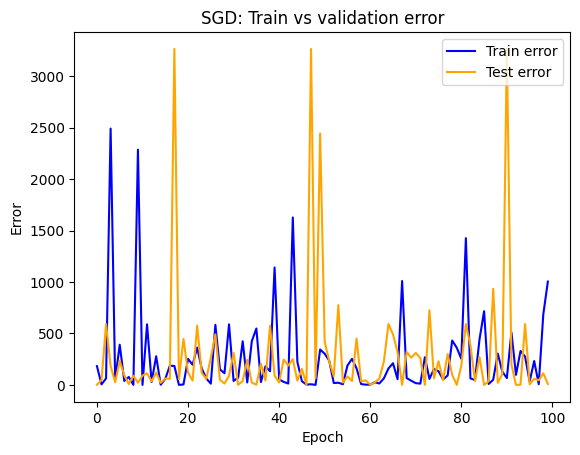

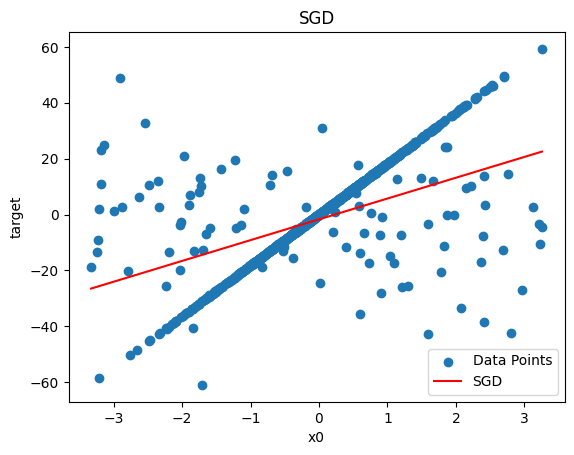

In [245]:
error_train = np.linspace(1, len(err_train_sgd), len(err_train_sgd))
error_test = np.linspace(1, len(err_test_sgd), len(err_test_sgd))
plt.plot(err_train_sgd, color='blue', label="Train error")
plt.plot(err_test_sgd, color='orange', label="Test error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("SGD: Train vs validation error")
plt.legend()
plt.show()

x_line = np.linspace(data['x0'].values.min(), data['x0'].values.max(), 100)
y_line = theta[1] * x_line + theta[0]

plt.scatter(data['x0'].values, data['target'].values, label='Data Points')
plt.plot(x_line, y_line, color='red', label='SGD')
plt.xlabel('x0')
plt.ylabel('target')
plt.legend()
plt.title('SGD')
plt.show()

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.

El GD calcula el gradiente utilizando todo el conjunto de entrenamiento en cada iteración, mientras que el SGD utiliza un punto de datos aleatorio para calcular el gradiente en cada iteración. En general, el SGD tiende a tener una convergencia más rápida, aunque su trayectoria puede ser más ruidosa debido a la aleatoriedad en la selección de datos. En comparación, el GD suele ser más suave pero puede ser más lento, especialmente en conjuntos de datos grandes.

2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.

------------
Iteracion 1
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 2
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 3
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 4
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 5
891    0.872760
795

C:\Users\cbureu\AppData\Local\Temp\ipykernel_7516\3599652903.py:33: RuntimeWarning: divide by zero encountered in divide
  if (np.all(((np.abs(theta-theta2))/theta) < tol)):


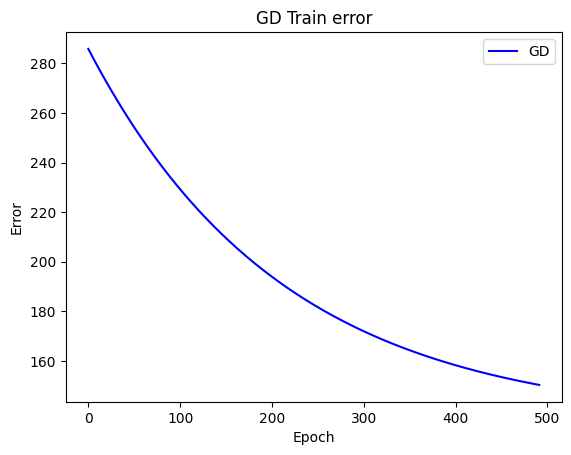

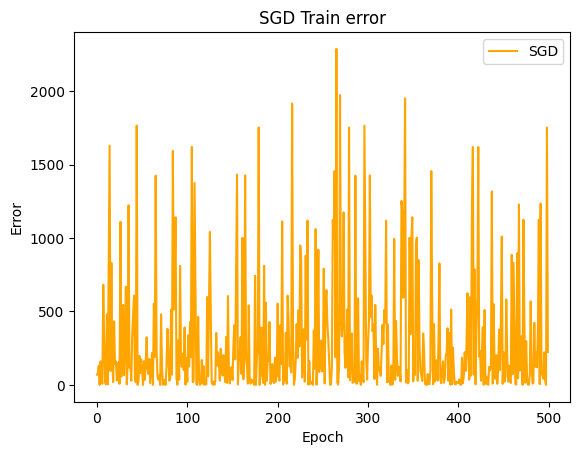

------------
Iteracion 1
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 2
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 3
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 4
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 5
891    0.872760
795

C:\Users\cbureu\AppData\Local\Temp\ipykernel_7516\3599652903.py:33: RuntimeWarning: divide by zero encountered in divide
  if (np.all(((np.abs(theta-theta2))/theta) < tol)):


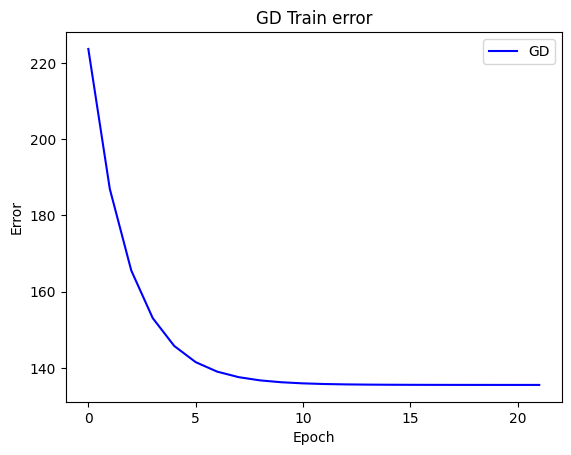

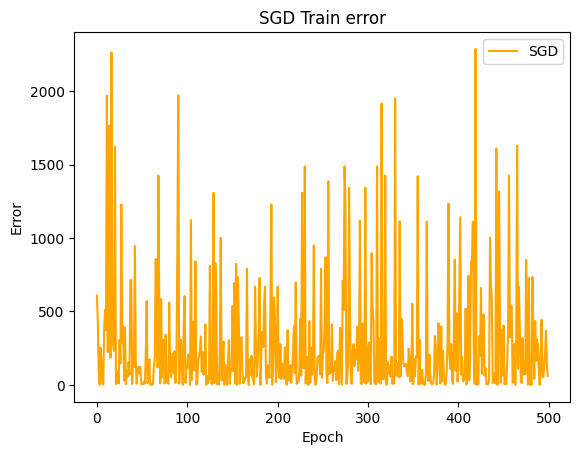

------------
Iteracion 1
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 2
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 3
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 4
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 5
891    0.872760
795

C:\Users\cbureu\AppData\Local\Temp\ipykernel_7516\3599652903.py:33: RuntimeWarning: divide by zero encountered in divide
  if (np.all(((np.abs(theta-theta2))/theta) < tol)):


------------
Iteracion 42
------------
Iteracion 43
------------
Iteracion 44
------------
Iteracion 45
------------
Iteracion 46
------------
Iteracion 47
------------
Iteracion 48
------------
Iteracion 49
------------
Iteracion 50
------------
Iteracion 51
------------
Iteracion 52
------------
Iteracion 53
------------
Iteracion 54
------------
Iteracion 55
------------
Iteracion 56
------------
Iteracion 57
------------
Iteracion 58
------------
Iteracion 59
------------
Iteracion 60
------------
Iteracion 61
------------
Iteracion 62
------------
Iteracion 63
------------
Iteracion 64
------------
Iteracion 65
------------
Iteracion 66
------------
Iteracion 67
------------
Iteracion 68
------------
Iteracion 69
------------
Iteracion 70
------------
Iteracion 71
------------
Iteracion 72
------------
Iteracion 73
------------
Iteracion 74
------------
Iteracion 75
------------
Iteracion 76
------------
Iteracion 77
------------
Iteracion 78
------------
Iteracion 79
------------

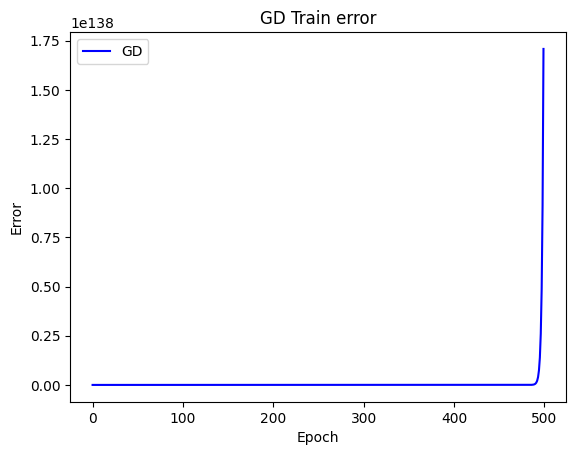

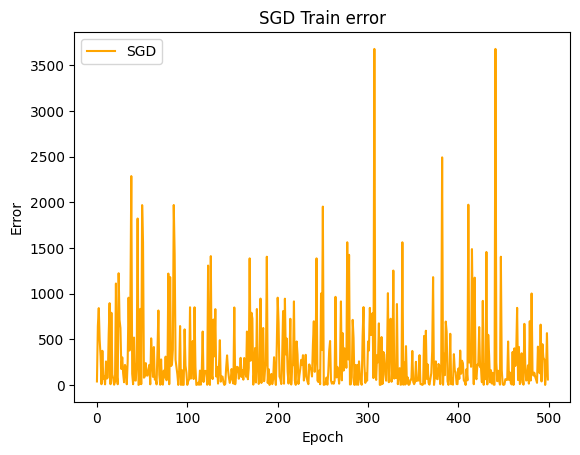

In [252]:
# Hiperparámetros
epoch = 500
tol = 0.001
theta = np.random.rand(2) 

# Épocas que deseas probar
alpha_to_try = [0.001, 0.1, 1]

for alpha in alpha_to_try:
    # Obtener parámetros para GD
    theta_gd, err_train_gd, err_test_gd = GD(
        X_train, y_train, X_test, y_test, theta, n_iteraciones=epoch, tol=tol, alpha=alpha)

    # Obtener parámetros para SGD
    theta_sgd, err_train_sgd, err_test_sgd = SGD(
        X_train, y_train, X_test, y_test, theta, n_iteraciones=epoch, tol=tol, alpha=alpha)

    # Train
    #plt.subplot(2, 1, 2)
    plt.plot(err_train_gd, color='blue', label="GD")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("GD Train error")
    plt.legend()
    plt.show()

    plt.plot(err_train_sgd, color='orange', label="SGD")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("SGD Train error")
    plt.legend()
    plt.show()


El learning rate influye en la rapidez con la que el algoritmo gradient descent converge. Si el lr es demasiado chico, el algoritmo puede converger lentamente. Si es demasiado grande, puede oscilar o divergir.

3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?


------------
Iteracion 1
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 2
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 3
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 4
891    0.872760
795    1.189783
471   -0.169082
432   -1.575071
632   -0.157691
         ...   
165    0.022587
953   -1.428291
912    0.631041
377    1.006523
352    2.970611
Name: x0, Length: 800, dtype: float64
------------
Iteracion 5
891    0.872760
795

C:\Users\cbureu\AppData\Local\Temp\ipykernel_7516\3599652903.py:33: RuntimeWarning: divide by zero encountered in divide
  if (np.all(((np.abs(theta-theta2))/theta) < tol)):


------------
Iteracion 185
------------
Iteracion 186
------------
Iteracion 187
------------
Iteracion 188
------------
Iteracion 189
------------
Iteracion 190
------------
Iteracion 191
------------
Iteracion 192
------------
Iteracion 193
------------
Iteracion 194
------------
Iteracion 195
------------
Iteracion 196
------------
Iteracion 197
------------
Iteracion 198
------------
Iteracion 199
------------
Iteracion 200
------------
Iteracion 201
------------
Iteracion 202
------------
Iteracion 203
------------
Iteracion 204
------------
Iteracion 205
------------
Iteracion 206
------------
Iteracion 207
------------
Iteracion 208
------------
Iteracion 209
------------
Iteracion 210
------------
Iteracion 211
------------
Iteracion 212
------------
Iteracion 213
------------
Iteracion 214
------------
Iteracion 215
------------
Iteracion 216
------------
Iteracion 217
------------
Iteracion 218
------------
Iteracion 219
------------
Iteracion 220
------------
Iteracion 221
-

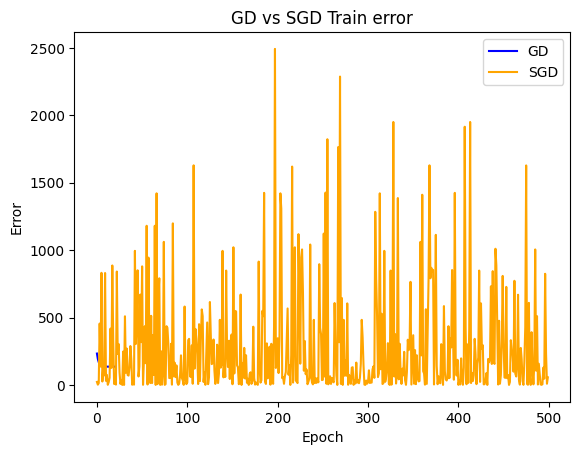

In [255]:
# Hiperparámetros
epoch = 500
tol = 0.001
theta = np.random.rand(2) 
alpha=0.1
# Obtener parámetros para GD
theta_gd, err_train_gd, err_test_gd = GD(X_train, y_train, X_test, y_test, theta, n_iteraciones=epoch, tol=tol, alpha=alpha)
# Obtener parámetros para SGD
theta_sgd, err_train_sgd, err_test_sgd = SGD(X_train, y_train, X_test, y_test, theta, n_iteraciones=epoch, tol=tol, alpha=alpha)    

# Train
#plt.subplot(2, 1, 2)
plt.plot(err_train_gd, color='blue', label="GD")
plt.plot(err_train_sgd, color='orange', label="SGD")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("GD vs SGD Train error")
plt.legend()
plt.show()


El GD puede mostrar una disminución más suave y constante en la pérdida a medida que avanzan las épocas debido a que utiliza toda la información del conjunto de entrenamiento.
El SGD puede mostrar una trayectoria más ruidosa en la curva de pérdida, pero generalmente converge más rápido debido a su enfoque estocástico.